# Imports

In [1]:
!pip install Pillow numpy

In [2]:
from PIL import Image
import numpy as np

from matplotlib import pyplot as plt

# NAIP Data

In [4]:
import cv2
from google.colab.patches import cv2_imshow

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (118901250 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


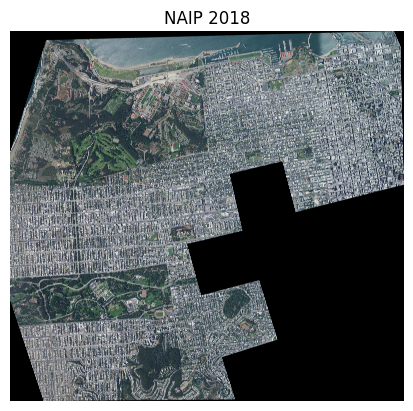

In [11]:
# load the image
naip_natural_tiff = Image.open('/content/drive/MyDrive/thesis/training_images/naip_natural_.tif')

naip_natural_array = np.array(naip_natural_tiff)

plt.imshow(naip_natural_array)
plt.title('NAIP 2018')
plt.axis('off')
plt.show()

# CHM

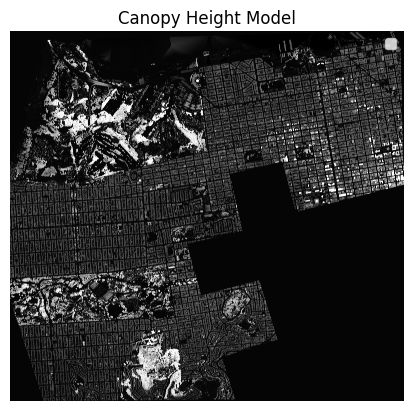

In [7]:
# load the image
chm_tiff = Image.open('/content/drive/MyDrive/thesis/training_images/CHM_Clip_Test.tif')

chm_array = np.array(chm_tiff)
chm_array = cv2.resize(chm_array, (naip_natural_array.shape[1], naip_natural_array.shape[0]))

# determine the 1st and 99th percentile values
chm_1st_percentile = np.percentile(chm_array, 1)
chm_99th_percentile = np.percentile(chm_array, 99)

# clip values below the 1st percentile and above the 99th percentile
chm_clipped = np.clip(chm_array, chm_1st_percentile, chm_99th_percentile)

plt.imshow(chm_clipped, cmap='gray')
plt.title('Canopy Height Model')
plt.axis('off')
plt.show()

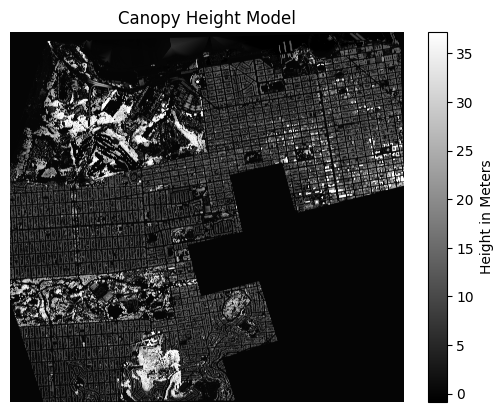

In [9]:
# display the image with a colorbar
fig, ax = plt.subplots()
cax = ax.imshow(chm_clipped, cmap='gray')  # Adjust the color map as necessary
ax.set_title('Canopy Height Model')
ax.axis('off')  # Hide axis labels

# create a colorbar
cbar = fig.colorbar(cax, ax=ax, orientation='vertical')
cbar.set_label('Height in Meters')

plt.show()

## Above 2.5m

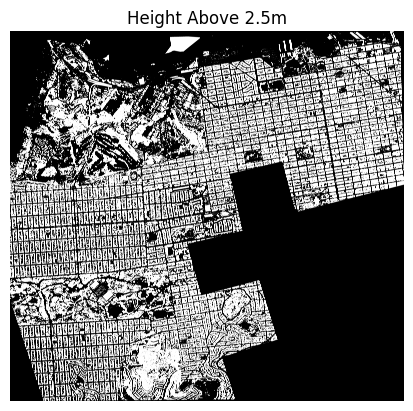

In [16]:
# create a mask where values are greater than 0.5
mask = chm_array > 2.5

filtered_chm = np.where(mask, 1, 0)

plt.imshow(filtered_chm, cmap='gray')
plt.title('Height Above 2.5m')
plt.axis('off')
plt.show()

# NDVI

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (118901250 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


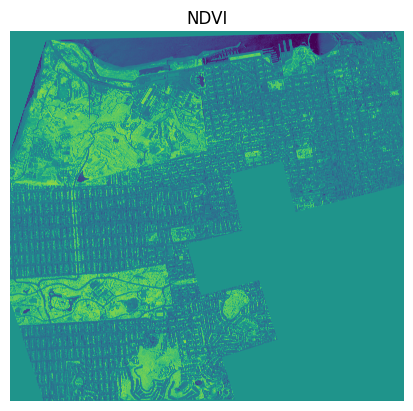

In [13]:
ndvi_tiff = Image.open('/content/drive/MyDrive/thesis/training_images/NDVI_NAIP_Test.tif')

ndvi_array = np.array(ndvi_tiff)
ndvi_array = cv2.resize(ndvi_array, (naip_natural_array.shape[1], naip_natural_array.shape[0]))

plt.imshow(ndvi_array)
plt.title('NDVI')
plt.axis('off')
plt.show()

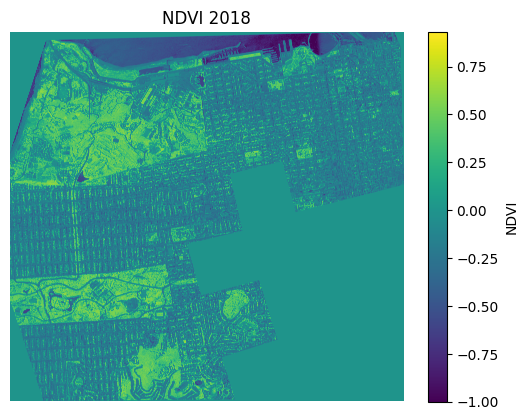

In [14]:
# display the image with a colorbar
fig, ax = plt.subplots()
cax = ax.imshow(ndvi_array)  # Adjust the color map as necessary
ax.set_title('NDVI 2018')
ax.axis('off')  # Hide axis labels

# create a colorbar
cbar = fig.colorbar(cax, ax=ax, orientation='vertical')
cbar.set_label('NDVI')

plt.show()

In [ ]:
# find minimum and maximum pixel values
min_val = np.min(ndvi_array)
max_val = np.max(ndvi_array)

print(f"Minimum pixel value: {min_val}")
print(f"Maximum pixel value: {max_val}")

Minimum pixel value: -1.0
Maximum pixel value: 0.931034505367279


## NDVI > 0.2

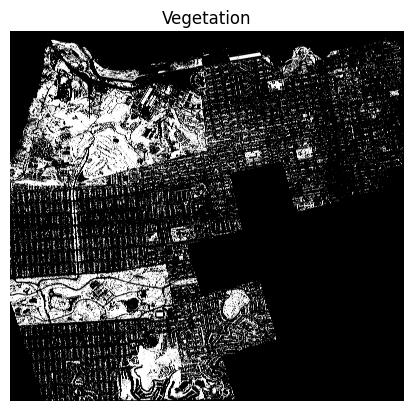

In [17]:
# create a mask where image1 values are greater than 0.2
mask = ndvi_array > 0.2

filtered_diff = np.where(mask, 1, 0)

plt.imshow(filtered_diff, cmap='gray') # Adjust the color map as necessary
plt.title('Vegetation')
plt.axis('off') # Hide axis labels
plt.show()

# Trees

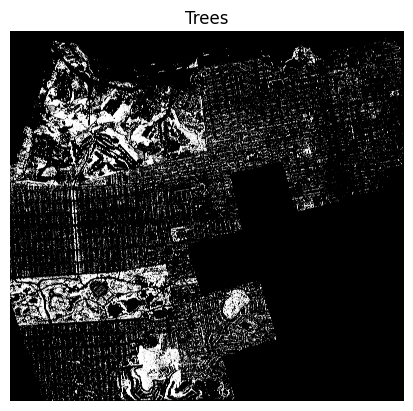

In [18]:
naip_chm_mask = (ndvi_array > 0.2) & (chm_array > 2.5)

naip_chm_mask_3d = naip_chm_mask[:, :, None] * np.ones(3, dtype=int)  # Shape becomes (height, width, 3)

filtered_naip = np.where(naip_chm_mask_3d, 255, 0)

plt.imshow(filtered_naip, cmap='gray', vmin=0, vmax=1)
plt.title('Trees')
plt.axis('off')
plt.show()

In [ ]:
naip_chm_mask_3d.shape

(10569, 11250, 3)

In [ ]:
naip_natural_array.shape

(10569, 11250, 3)

## Percent Tree

In [ ]:
# Step 1: Identify "no value" pixels
no_value_pixels = np.all(naip_natural_array == 0, axis=-1)

# Step 2: Calculate the number of "tree" pixels using the mask before it was expanded to 3D
# Since the mask identifies "tree" pixels as True, summing over it gives the count of "tree" pixels
tree_pixel_count = np.sum(naip_chm_mask)

# Exclude "no value" pixels from the denominator
# Count the total number of pixels that are not "no value"
non_na_pixel_count = np.sum(~no_value_pixels)

# Calculate the percentage of "tree" pixels out of non-"no value" pixels
percentage_trees = (tree_pixel_count / non_na_pixel_count) * 100

print(f"Percentage of 'tree' pixels (excluding 'no value' pixels): {percentage_trees}%")

Percentage of 'tree' pixels (excluding 'no value' pixels): 16.37510798690777%


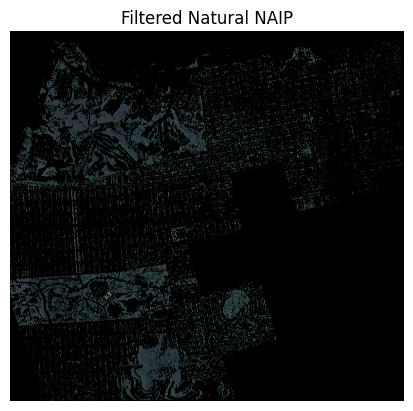

In [ ]:
filtered_naip_natural = np.where(naip_chm_mask_3d, naip_natural_array, 0)

plt.imshow(filtered_naip_natural)
plt.title('Filtered Natural NAIP')
plt.axis('off')
plt.show()

# Pickle the Tree Mask

In [ ]:
import pickle

with open('/content/drive/My Drive/thesis/naip_chm_mask_3d.pkl', 'wb') as f:
    pickle.dump(naip_chm_mask_3d, f)